# Situation
Jane has been tasked in investigating the rates of cancellations at a hotel. However before she begins her in-depth investigation she is keen to understand if the data she poses is adequate. As such, she has requested for a PCA to be undertaken to assess any links exist. 

# Overview
The data June has provided includes 36275 bookings and whether they were fulfilled and includes 16 variables. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

import os

df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv", )

df.drop("Booking_ID", axis = 1, inplace = True)

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

Subsequently, a PCA may be an optimal course of action in the preliminary stages of Jane's project. 

For this, the data requires some processing, converting the categorical data to numeric and for numeric data, scaling them to avoid any distortions based upon the scale variation in the data. 

In [3]:
x= df.drop("booking_status", axis = 1)
y = df["booking_status"]

numcols = x.select_dtypes("int64").columns
catcols = x.select_dtypes("object").columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

t = ColumnTransformer(transformers =[
    ("onehot", OneHotEncoder(),catcols ),
    ("Scale", StandardScaler(), numcols)
])

train_features =t.fit_transform(x)

Following this, the ideal PCA would be 2. This would enable Jane to evaluate the data at a glance through the use of visualisation. 

In [4]:
from sklearn.decomposition import PCA
PCA = PCA(n_components =2)

PCA.fit(train_features)

x_pca =PCA.transform(train_features)

pca = pd.DataFrame(x_pca)
pca_y = pca.join(y)

The resulting model shows the following. It appears that whilst not perfect, the results suggest that additional investigation may reveal factors which may increase the probability of cancellation. The majority of the cancellations are clustered in one group whilst the other clusters are mainly fulfilled books. That said there may be some degree of randomness as this groupings does include some outliers.

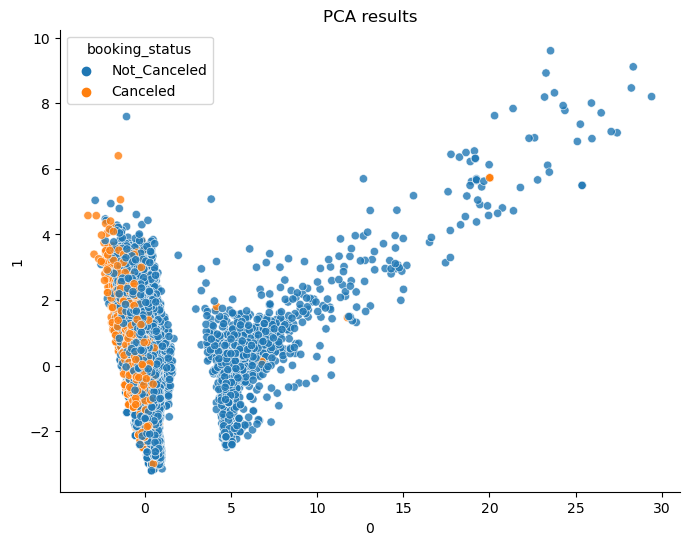

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = pca_y, x=0, y=1, hue="booking_status", alpha = .8)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("PCA results")

plt.show()